In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy import stats
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_rows', 2000)

%matplotlib inline
    
df = pd.read_csv("train.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)
df_test = pd.read_csv("test.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)

print(df.shape)
print(df_test.shape)
#print(df.head())
#print(df.describe())
print(df.dtypes)
#df = df.dropna()


from sklearn.preprocessing import Imputer


########################Dealing with missing values

#missing data
# total = df.isnull().sum().sort_values(ascending=False)
# percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(20))

data_aux = df.append(df_test)


print("Missing values before remove NA: " , data_aux.columns[data_aux.isnull().any()])

#[data_aux[i].fillna(inplace=True,value='No') for i in data_aux.columns if data_aux[i].dtype==np.object  ]

#Alley
data_aux.Alley.fillna(inplace=True,value='No')

#BsmtQual
data_aux.BsmtQual.fillna(inplace=True,value='No')

#BsmtCond
data_aux.BsmtCond.fillna(inplace=True,value='No')

#BsmtExposure
data_aux.BsmtExposure.fillna(inplace=True,value='No')

#BsmtFinType1
data_aux.BsmtFinType1.fillna(inplace=True,value='No')

#BsmtFinType2
data_aux.BsmtFinType2.fillna(inplace=True,value='No')

#FireplaceQu
data_aux.FireplaceQu.fillna(inplace=True,value='No')    

#GarageType
data_aux.GarageType.fillna(inplace=True,value='No')

#GarageFinish
data_aux.GarageFinish.fillna(inplace=True,value='No')

#GarageQual 
data_aux.GarageQual.fillna(inplace=True,value='No')
    
#GarageCond
data_aux.GarageCond.fillna(inplace=True,value='No')

#PoolQC
data_aux.PoolQC.fillna(inplace=True,value='No')
    
#Fence
data_aux.Fence.fillna(inplace=True,value='No')

#MiscFeature
data_aux.MiscFeature.fillna(inplace=True,value='No')
    
print("Missing values after insert No, i.e., real missing values: " , data_aux.columns[data_aux.isnull().any()])

    
#Numeric fields    
#imp = Imputer(missing_values='NaN', strategy='mean', axis=1)  - insert the mean   
    
#BsmtFinSF1
#df.dropna(axis=0,subset=['BsmtFinSF1'],inplace=True)
#df['BsmtFinSF1'] = imp.fit_transform(df['BsmtFinSF1'].reshape(1,-1)).transpose()    
data_aux.BsmtFinSF1.fillna(inplace=True,value=0)
    
#BsmtFinSF2
#df.dropna(axis=0,subset=['BsmtFinSF2'],inplace=True)
#df['BsmtFinSF2'] = imp.fit_transform(df['BsmtFinSF2'].reshape(1,-1)).transpose()    
data_aux.BsmtFinSF2.fillna(inplace=True,value=0)
    
#BsmtUnfSF
#df.dropna(axis=0,subset=['BsmtUnfSF'],inplace=True)
#df.drop('BsmtUnfSF',axis=1,inplace=True)
#df['BsmtUnfSF'] = imp.fit_transform(df['BsmtUnfSF'].reshape(1,-1)).transpose()    
data_aux.BsmtUnfSF.fillna(inplace=True,value=0)
    
#TotalBsmtSF
#df.dropna(axis=0,subset=['TotalBsmtSF'],inplace=True)
#df['TotalBsmtSF'] = imp.fit_transform(df['TotalBsmtSF'].reshape(1,-1)).transpose()    
data_aux.TotalBsmtSF.fillna(value=0,inplace=True)
    
#BsmtFullBath - apenas na base de teste tem NA.Nao posso remover a linha
#df['BsmtFullBath'] = imp.fit_transform(df['TotalBsmtSF'].reshape(1,-1)).transpose()    
data_aux.BsmtFullBath.fillna(inplace=True,value=0)
    
#BsmtHalfBath- apenas na base de teste tem NA.Nao posso remover a linha
#df['BsmtHalfBath'] = imp.fit_transform(df['BsmtHalfBath'].reshape(1,-1)).transpose()    
data_aux.BsmtHalfBath.fillna(inplace=True,value=0)
        
#GarageCars
#df.dropna(axis=0,subset=['GarageCars'],inplace=True)
#df['GarageCars'] = imp.fit_transform(df['GarageCars'].reshape(1,-1)).transpose()    
data_aux.GarageCars.fillna(value=0,inplace=True)
    
#GarageArea
#df.dropna(axis=0,subset=['GarageArea'],inplace=True)
#df['GarageArea'] = imp.fit_transform(df['GarageArea'].reshape(1,-1)).transpose()    
data_aux.GarageArea.fillna(value=0,inplace=True)
        
#LotFrontage 
data_aux['LotFrontage'].fillna(inplace=True,value=0)
    
#GarageYrBlt - remove the hole column
data_aux.GarageYrBlt.fillna(inplace=True,value=0)
   
#MasVnrArea 
data_aux.MasVnrArea.fillna(inplace=True,value=0)
    
#####Categorial fields


#KitchenQual
data_aux.KitchenQual = data_aux.KitchenQual.mode()[0]

#Functional
data_aux.Functional = data_aux.Functional.mode()[0]

#Utilities
data_aux.Utilities = data_aux.Utilities.mode()[0]  
    
#SaleType
data_aux.SaleType  = data_aux.SaleType.mode()[0]
    
#Exterior1st- nao posso remover linhas do teste
data_aux.Exterior1st = data_aux.Exterior1st.mode()[0]

#Exterior2nd
data_aux.Exterior2nd = data_aux.Exterior2nd.mode()[0]       

#Electrical - remove the records where the value is NA
data_aux.Electrical = df['Electrical'].mode()[0]

#MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
data_aux.MSZoning = data_aux.MSZoning.mode()[0]
     
#MasVnrType - remove the records where the value is NA 
data_aux.MasVnrType=df['MasVnrType'].mode()[0]


print("Missing values after all: " , data_aux.columns[data_aux.isnull().any()])

########## End handle missing values


# MSSubClass as str
data_aux['MSSubClass'] = data_aux['MSSubClass'].astype("str")
#After converting this column to String, it will be treated as categorical
    
# Converting OverallCond to str
data_aux.OverallCond = data_aux.OverallCond.astype("str")
    
    
# Year and Month to categorical
data_aux['YrSold'] = data_aux['YrSold'].astype("str")
data_aux['MoSold'] = data_aux['MoSold'].astype("str")    

########################End dealing with missing values


# The OneHotEncoder converts features represented as numeric codes (so they are values that can't be ordered)
#to their binary representation
#enc = preprocessing.OneHotEncoder() 
#df = enc.fit_transform(df)


########################Tratando campos nominais

#vec = DictVectorizer()
#aux = np.asmatrix(vec.fit_transform(df.transpose().to_dict().values()).toarray())
#data_train = pd.DataFrame(aux,columns=vec.feature_names_)
#data_train = pd.get_dummies(df)


################################################# Base de teste

#vec = DictVectorizer()
#aux_test = vec.fit_transform(df_test.transpose().to_dict().values()).toarray()
#data_test = pd.DataFrame(aux_test,columns=vec.feature_names_)
#data_test = pd.get_dummies(df_test) 


data_final = pd.get_dummies(data_aux)

data_train = data_final.iloc[:-df_test.shape[0],:]
data_train.to_csv('train_no_categorical.csv')
print("New shape train:" , np.shape(data_train))
print("Indice da coluna SalePrice no novo dataset" , data_train.columns.get_loc('SalePrice'))

data_test = data_final.iloc[df.shape[0]:,:]
data_test.to_csv('test_no_categorical.csv')
data_test.drop('SalePrice',inplace=True,axis=1)
print("New shape test:" , np.shape(data_test))

#Valores numericos que continham NA sao detectados como String. Assim, depois que removemos o NA temos que setar corretamente 
#o tipo 
#df_test.BsmtFullBath = df_test.BsmtFullBath.astype("int64")
#df_test.BsmtHalfBath = df_test.BsmtHalfBath.astype("int64")
#df_test.GarageCars = df_test.GarageCars.astype("int64")
#df_test.GarageArea = df_test.GarageArea.astype("int64")

print("Null values treino \n", data_train.columns[data_train.isnull().any()])
print("Null values test \n", data_test.columns[data_test.isnull().any()])


print("Colunas que existem apenas teste : " , data_test.columns.difference(data_train.columns))
print("Colunas que existem apenas treino : " , data_train.columns.difference(data_test.columns))


(1460, 81)
(1459, 80)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Hea

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


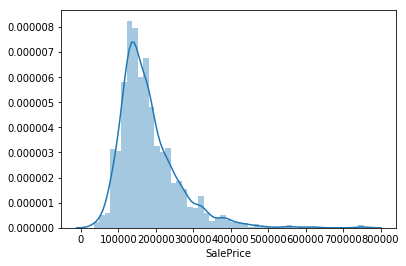

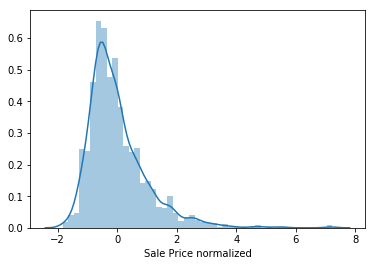

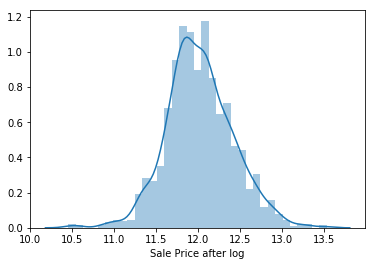

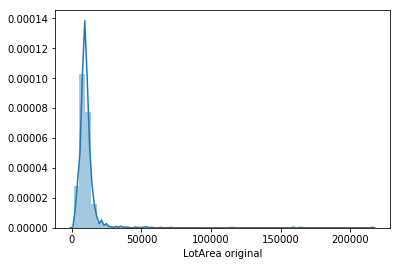

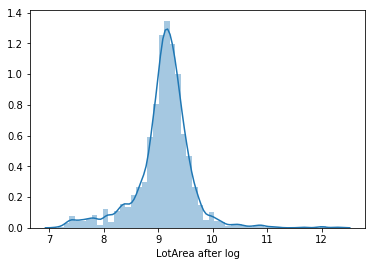

In [2]:
print(data_train.SalePrice.describe())

sns.distplot(data_train['SalePrice']);
#plt.hist(data_train['SalePrice'],bins=50,label="SalePrice original")
plt.show()
saleprice_scaled = preprocessing.StandardScaler().fit_transform((data_train['SalePrice'][:,np.newaxis]));
sns.distplot(saleprice_scaled,axlabel="Sale Price normalized")
#plt.hist(saleprice_scaled,bins=50,label="SalePrice normalized")
plt.show()
saleprice_log = np.log(data_train['SalePrice'])
sns.distplot(saleprice_log,axlabel="Sale Price after log")
#plt.hist(saleprice_log,bins=50,label="SalePrice after log transformation")
plt.show()
sns.distplot(data_train['LotArea'],axlabel="LotArea original")
#plt.hist(data_train['LotArea'],bins=50,label="LotArea original")
plt.show()
sns.distplot(np.log(data_train['LotArea']),axlabel="LotArea after log")
#plt.hist(np.log(data_train['LotArea']),bins=50,label="LotArea after log")

data_train['SalePrice'] = np.log1p(data_train['SalePrice'])
data_train['OverallQual'] = np.log1p(data_train['OverallQual'])
data_train['LotArea'] = np.log1p(data_train['LotArea'])
data_test['OverallQual'] = np.log1p(data_test['OverallQual'])
data_test['LotArea'] = np.log1p(data_test['LotArea'])
# Adding total sqfootage feature 
#data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['1stFlrSF'] + data_train['2ndFlrSF']
#data_test['TotalSF'] = data_test['TotalBsmtSF'] + data_test['1stFlrSF'] + data_test['2ndFlrSF']
data_train.drop('Id',axis=1,inplace=True)
data_test.drop('Id',axis=1,inplace=True)


In [3]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df,name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name,x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    

#Validation function
n_folds = 5

def rmsle_cv(model,train,y_train):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


#Python dictionary to collect the results
RMSE_results_allfeatures = {
    
    'LinearRegression':[0.0],
    'Lasso':[0.0],
    'Ridge':[0.0],
    'SGDR':[0.0],
    'ElasticNet':[0.0],
    'SVM':[0.0],
    'NN':[0.0],
    'GradientBoosting':[0.0],
    'RF':[0.0],
    'TensorFlow':[0.0]
}
RMSE_results_lessfeatures = {
    
    'LinearRegression':[0.0],
    'Lasso':[0.0],
    'Ridge':[0.0],
    'SGDR':[0.0],
    'ElasticNet':[0.0],
    'SVM':[0.0],
    'NN':[0.0],
    'GradientBoosting':[0.0],
    'RF':[0.0],
    'TensorFlow':[0.0]
}




In [4]:
print("\n Tentativa de selecionar melhores features \n")

#from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


#Removing features with low variance
#print("Original shape: {}".format(np.shape(df.iloc[:,0:-1])))
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#features = sel.fit_transform(df.iloc[:,0:-1])
#print("Shape apos Removing features with low variance {}".format(np.shape(features))) #nenhuma foi selecionada 
#print("\n")

#Tree-based feature selection

x_train = data_train.drop('SalePrice',axis=1)
y_train = data_train['SalePrice']
clf = ExtraTreesRegressor(n_estimators=20)
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(data.index[0], ascending=False).T

print("Features selected with Tree-based selection \n")
yyy = np.asarray((data.columns[0:30]))
xxx = np.asarray((data.iloc[:,0:30]))
print(yyy)
print("\n Relevance of each feature \n")
print(xxx)

model = SelectFromModel(clf, prefit=True)
aux = model.transform(x_train)

print("\n New shape for train after Tree-based feature selection: {}".format(aux.shape))
data_train_less_features = pd.concat([pd.DataFrame(aux),pd.DataFrame(y_train)],axis=1)
data_train_less_features.to_csv('data_train_less_features.csv')
aux = model.transform((data_test))
data_test_less_features = pd.DataFrame(aux)
print("\n New shape for test after Tree-based feature selection: {}".format(aux.shape))
data_test_less_features.to_csv('data_test_less_features.csv')

print("\n End of the process of try selecting best features \n")

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split





 Tentativa de selecionar melhores features 

Features selected with Tree-based selection 

['ExterQual_TA' 'OverallQual' 'GrLivArea' 'GarageCars' 'BsmtQual_Ex'
 'ExterQual_Fa' 'FireplaceQu_No' 'FullBath' '1stFlrSF' 'CentralAir_N'
 'TotalBsmtSF' 'CentralAir_Y' 'GarageArea' 'GarageType_Detchd'
 'MSSubClass_60' 'BedroomAbvGr' 'BsmtFinSF1' 'LotArea' '2ndFlrSF'
 'TotRmsAbvGrd' 'Fireplaces' 'YearBuilt' 'MSSubClass_30'
 'GarageType_Attchd' 'BldgType_1Fam' 'BsmtQual_Gd' 'BsmtFullBath'
 'YearRemodAdd' 'Condition1_Norm' 'GarageQual_TA']

 Relevance of each feature 

[[ 0.30212496  0.13933675  0.06964316  0.06932277  0.03371495  0.03368765
   0.0308568   0.01650193  0.01433072  0.01303694  0.01271663  0.01236436
   0.0119926   0.01047414  0.00747959  0.00720828  0.00674498  0.00656007
   0.0064954   0.00627004  0.00509094  0.00463494  0.00453936  0.00452981
   0.00445193  0.0042771   0.00400123  0.00394617  0.00393787  0.00382624]]

 New shape for train after Tree-based feature selection: (1460,

In [5]:
#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
data_test = scaler.transform(data_test) 


x_train_less = data_train_less_features.drop('SalePrice',axis=1)
scalerLess = preprocessing.StandardScaler().fit((x_train_less))
x_train_less = scalerLess.transform(x_train_less)
data_test_less_features = scalerLess.transform(data_test_less_features)


In [6]:
#Starting making predictors

from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.kernel_ridge import KernelRidge
#Caso 1 - Linear Regression 
print("Linear Regression ")

# Shuffle
#np.random.seed(42)
#data_train = data_train.reindex(np.random.permutation(data_train.index))
#data_train.reset_index(inplace=True, drop=True)

classifier = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_allfeatures['LinearRegression'] = 0.0

print("\n\n")
print("SGDRegressor \n\n")


classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_allfeatures['SGDR'] = 0.0

print("\n\n")
print("Ridge \n\n")


classifierRidgeAll = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)#RidgeCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierRidgeAll.fit(x_train_fold, y_train_fold)
    pred = classifierRidgeAll.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierRidgeAll.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_allfeatures['Ridge'] = round(score,3)

print("\n\n")
print("Lasso \n\n")


classifierLassoAll = Lasso(alpha =0.0005, random_state=1)

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierLassoAll.fit(x_train_fold, y_train_fold)
    pred = classifierLassoAll.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierLassoAll.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_allfeatures['Lasso'] = round(score,3)

print("\n\n")
print("Elastic Net \n\n")


classifierElasticNetAll = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierElasticNetAll.fit(x_train_fold, y_train_fold)
    pred = classifierElasticNetAll.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierElasticNetAll.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_allfeatures['ElasticNet'] = round(score,3)


###########Less features

print("\n\n Less Features")
print("Linear Regression \n")

classifierLinearRegression = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train_less):
    fold+=1
    print("Fold #{}".format(fold))
    pred = []    
    x_train_fold = x_train_less[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_less[test]
    y_test_fold = y_train[test]
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierLinearRegression.score(X=x_test_fold,y=y_test_fold))

  
#Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_lessfeatures['LinearRegression'] = round(score,3)

# Write the cross-validated prediction
pred = []
pred = np.array(pred)
pred = np.expm1(classifierLinearRegression.predict((data_test_less_features)))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_LinearRegression.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_LinearRegression.csv', columns=['SalePrice'])




print("\n\n")
print("SGDRegressor \n\n")

classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_less):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_less[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_less[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_lessfeatures['SGDR'] = round(score,3)


print("\n\n")
print("Ridge \n\n")

classifierRidgeLess = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)#RidgeCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_less):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_less[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_less[test]
    y_test_fold = y_train[test]
    
    classifierRidgeLess.fit(x_train_fold, y_train_fold)
    pred = classifierRidgeLess.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierRidgeLess.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_lessfeatures['Ridge'] = round(score,3)

print("\n\n")
print("Lasso \n\n")


classifierLassoLess = Lasso(alpha =0.0005, random_state=1)

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_less):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_less[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_less[test]
    y_test_fold = y_train[test]
    
    classifierLassoLess.fit(x_train_fold, y_train_fold)
    pred = classifierLassoLess.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierLassoLess.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_lessfeatures['Lasso'] = round(score,3)

print("\n\n")
print("Elastic Net \n\n")


classifierElasticNetLess = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_less):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_less[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_less[test]
    y_test_fold = y_train[test]
    
    classifierElasticNetLess.fit(x_train_fold, y_train_fold)
    pred = classifierElasticNetLess.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierElasticNetLess.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_lessfeatures['ElasticNet'] = round(score,3)

Linear Regression 
Fold #1
Fold score (RMSE): 3671857840927.44
Accuracy: -90232281206550891035885568.000
Fold #2
Fold score (RMSE): 2132015353060.05
Accuracy: -25151146936882027533697024.000
Fold #3
Fold score (RMSE): 1182102795091.83
Accuracy: -8327646775246298630062080.000
Fold #4
Fold score (RMSE): 1963666653102.12
Accuracy: -26646905851137431938531328.000
Fold #5
Fold score (RMSE): 3630120745706.21
Accuracy: -86151884937883914902437888.000

 Average RMSE: 2700339232049.925



SGDRegressor 


Fold #1
Fold score (RMSE): 14.74
Accuracy: -1453.461
Fold #2
Fold score (RMSE): 215.73
Accuracy: -257516.543
Fold #3
Fold score (RMSE): 72.98
Accuracy: -31739.260
Fold #4
Fold score (RMSE): 21.17
Accuracy: -3096.588
Fold #5
Fold score (RMSE): 13.93
Accuracy: -1267.149

 Average RMSE: 102.68969477296017



Ridge 


Fold #1
Fold score (RMSE): 0.12
Accuracy: 0.902
Fold #2
Fold score (RMSE): 0.15
Accuracy: 0.875
Fold #3
Fold score (RMSE): 0.15
Accuracy: 0.866
Fold #4
Fold score (RMSE): 0.11
Accurac

{'LinearRegression': 0.0, 'Lasso': 0.14899999999999999, 'Ridge': 0.14399999999999999, 'SGDR': 0.0, 'ElasticNet': 0.14899999999999999, 'SVM': [0.0], 'NN': [0.0], 'GradientBoosting': [0.0], 'RF': [0.0], 'TensorFlow': [0.0]}


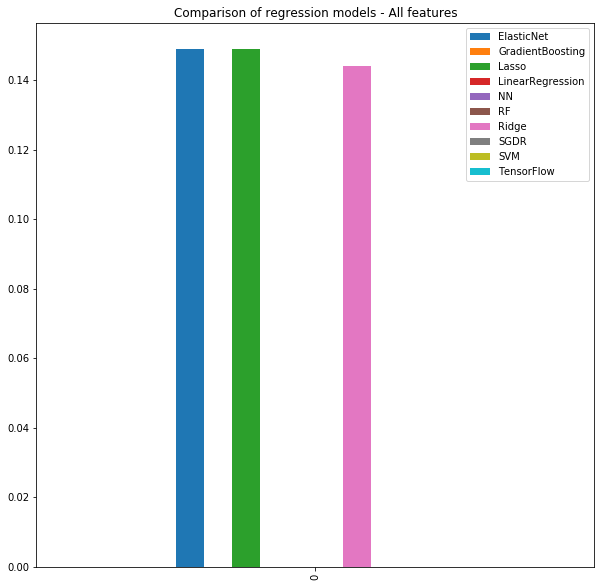

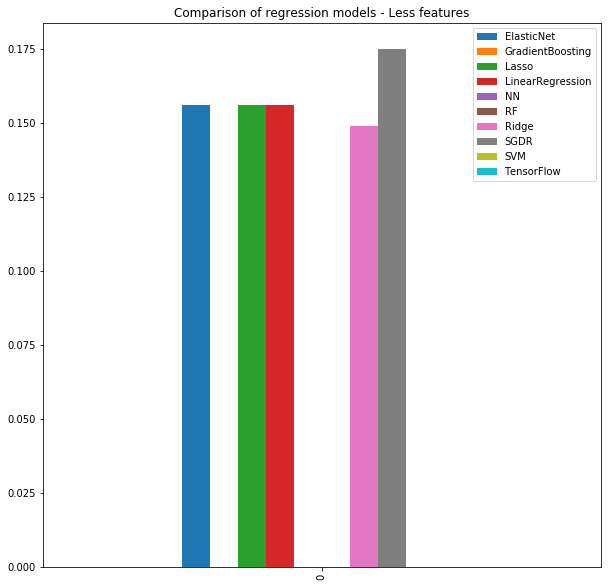

In [7]:
print(RMSE_results_allfeatures)
graph = pd.DataFrame(RMSE_results_allfeatures,index=[0])
graph.plot(kind='bar',title="Comparison of regression models - All features",figsize=(10,10))
graph = pd.DataFrame(RMSE_results_lessfeatures,index=[0])
graph.plot(kind='bar',title="Comparison of regression models - Less features",figsize=(10,10))

In [8]:
#Caso 3 - SVM
from sklearn.svm import SVR
from sklearn.svm import NuSVR

print("SVM")

# Shuffle
#np.random.seed(42)
#data_train = data_train.reindex(np.random.permutation(data_train.index))
#data_train.reset_index(inplace=True, drop=True)

#x_train_svm = np.ascontiguousarray(x_train)
x_train_svm = x_train

classifierSVMAll = SVR(kernel='linear', C=1e4) #34761.27693615821
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_svm):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_svm[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_svm[test]
    y_test_fold = y_train[test]
    
    #classifierSVMAll.fit(x_train_fold, y_train_fold)
    #pred = classifierSVMAll.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

  
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
#score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_allfeatures['SVM'] = 0.0

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n Less features \n")
x_train_svm = np.ascontiguousarray(x_train_less)


#classifier = SVR(kernel='rbf', C=1e3, gamma=0.1) #66483.84692815947
classifierSVRLess = SVR(kernel='linear', C=1e4) #34761.27693615821
#classifier = SVR(kernel='poly', C=1e3, degree=3) #86747.4465877091
#classifier = NuSVR(C=1e3) #57249.1589623674

kf = KFold(10, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train_svm):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_svm[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_svm[test]
    y_test_fold = y_train[test]
    
    #classifierSVRLess.fit(x_train_fold, y_train_fold)
    #pred = classifierSVRLess.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

 
    

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
#score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results_lessfeatures['SVM'] = 0.0
# Write the cross-validated prediction
pred = []
pred = np.array(pred)
#pred = classifierSVRLess.predict(scaler.transform(data_test_less_features))
#pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_SVR.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_SVR.csv', columns=['SalePrice'])

SVM
Fold #1
Fold #2
Fold #3
Fold #4
Fold #5

 Average RMSE: 0.15615086647267193


 Less features 

Fold #1
Fold #2
Fold #3
Fold #4
Fold #5
Fold #6
Fold #7
Fold #8
Fold #9
Fold #10

 Average RMSE: 0.15615086647267193


In [9]:
from sklearn.neural_network import MLPRegressor

# Shuffle
print("NN MLPRegressor")
#np.random.seed(42)
#data_train = data_train.reindex(np.random.permutation(data_train.index))
#data_train.reset_index(inplace=True, drop=True)


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,4,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,2), random_state=1)
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_less):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_less[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_less[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


NN MLPRegressor
Fold #1
Fold score (RMSE): 0.23
Accuracy: 0.649
Fold #2
Fold score (RMSE): 0.25
Accuracy: 0.653
Fold #3
Fold score (RMSE): 0.21
Accuracy: 0.743
Fold #4
Fold score (RMSE): 0.34
Accuracy: 0.188
Fold #5
Fold score (RMSE): 0.28
Accuracy: 0.502

 Average RMSE: 0.2653204188185003



Fold #1
Fold score (RMSE): 0.15
Accuracy: 0.856
Fold #2
Fold score (RMSE): 0.16
Accuracy: 0.851
Fold #3
Fold score (RMSE): 0.15
Accuracy: 0.857
Fold #4
Fold score (RMSE): 0.14
Accuracy: 0.856
Fold #5
Fold score (RMSE): 0.18
Accuracy: 0.781

 Average RMSE: 0.15925620342672406


In [10]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

# Shuffle
print("Random Forests")
#np.random.seed(42)
#data_train = data_train.reindex(np.random.permutation(data_train.index))
#data_train.reset_index(inplace=True, drop=True)

# Split into train/test
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(data_train.drop('SalePrice',axis=1), data_train['SalePrice'], 
                                                    test_size=0.20, random_state=42)

classifierAllFeaturesRF = RandomForestRegressor(n_estimators=60,oob_score=True)

classifierAllFeaturesRF.fit(x_train_rf, y_train_rf)

# The mean squared error
pred = classifierAllFeaturesRF.predict(x_test_rf)
score = np.sqrt(metrics.mean_squared_error(y_test_rf, pred))
print("Mean squared error using all features and no normalization: {}".format(score))
# Evaluate success using accuracy
print("Accuracy using all features and no normalization: %.3f" % classifierAllFeaturesRF.score(X=x_test_rf,y=y_test_rf))
print("\n\n")


#classifier = RandomForestRegressor(n_estimators=1000,oob_score=True)

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    #print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierAllFeaturesRF.fit(x_train_fold, y_train_fold)
    pred = classifierAllFeaturesRF.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    #print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    #print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE using all features, cross validation and normalizing: {}".format(score))    
print("\n oob score using all features cross validation and normalizing: {}".format(classifierAllFeaturesRF.oob_score_))    
RMSE_results_allfeatures['RF'] = round(score,3)
# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = np.expm1(classifierAllFeaturesRF.predict((data_test)))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_RF_full_features.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_RF_full_features.csv', columns=['SalePrice'])

###########Less features
print("\n\n Less features \n\n")

# Split into train/test
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(data_train_less_features.drop('SalePrice',axis=1), 
                                    data_train_less_features['SalePrice'], test_size=0.20, random_state=42)

classifierRF_lessFeatures = RandomForestRegressor(n_estimators=60,oob_score=True)

classifierRF_lessFeatures.fit(x_train_rf, y_train_rf)

# The mean squared error
pred = classifierRF_lessFeatures.predict(x_test_rf)
score = np.sqrt(metrics.mean_squared_error(y_test_rf, pred))
print("Mean squared error using less features and no normalization: {}".format(score))
# Evaluate success using accuracy
print("Accuracy using less features and no normalization: %.3f" % classifierRF_lessFeatures.score(X=x_test_rf,y=y_test_rf))
print("\n\n")


kf = KFold(n_splits=5, random_state=7)    

oos_y = []
oos_pred = []
fold = 0
pred = []

#classifierRandomForestRegressor = RandomForestRegressor(n_estimators=1000,oob_score=True,max_depth=3)

for training, test in kf.split(x_train_less):
    fold+=1
    #print("Fold #{}".format(fold))
        
    x_train_fold = x_train_less[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_less[test]
    y_test_fold = y_train[test]
    
    classifierRF_lessFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierRF_lessFeatures.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    #print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    #print("Accuracy: %.3f" % classifierRandomForestRegressor.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE (corss) less features, normalizing: {}".format(score))    
print("\n oob score (cross) less features, normalizing: {}".format(classifierRF_lessFeatures.oob_score_))    
RMSE_results_lessfeatures['RF'] = round(score,3)

# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = np.expm1(classifierRF_lessFeatures.predict((data_test_less_features)))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_RF_less_features.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_RF_less_features.csv', columns=['SalePrice'])




Random Forests
Mean squared error using all features and no normalization: 0.1554190532099204
Accuracy using all features and no normalization: 0.871




 Average RMSE using all features, cross validation and normalizing: 0.1481113352130034

 oob score using all features cross validation and normalizing: 0.8589364295935438


 Less features 


Mean squared error using less features and no normalization: 0.15928066764613574
Accuracy using less features and no normalization: 0.864




 Average RMSE (corss) less features, normalizing: 0.14823775243822815

 oob score (cross) less features, normalizing: 0.8539897394105409


In [11]:
from sklearn.ensemble import GradientBoostingRegressor


# Shuffle
#np.random.seed(42)
#data_train_less_features = data_train_less_features.reindex(np.random.permutation(data_train_less_features.index))
#data_train_less_features.reset_index(inplace=True, drop=True)

#GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                   max_depth=4, max_features='sqrt',
#                                   min_samples_leaf=15, min_samples_split=10, 
#                                   loss='huber', random_state =5)

classifierGBRLess = GradientBoostingRegressor(n_estimators=10000, 
                                              learning_rate=0.01, 
                                              min_samples_leaf=25, 
                                              min_samples_split=20,
                                          loss='ls')

kf = KFold(n_splits=5, random_state=7)    

oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train_less):
    fold+=1
    #print("Fold #{}".format(fold))
        
    x_train_fold = x_train_less[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_less[test]
    y_test_fold = y_train[test]
    
    classifierGBRLess.fit(x_train_fold, y_train_fold)
    pred = classifierGBRLess.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    #print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    #print("Accuracy: %.3f" % classifierRandomForestRegressor.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE (corss) less features, normalizing: {}".format(score))    
print("\n\n")


RMSE_results_lessfeatures['GradientBoosting'] = round(score,3)

#save the contest result 
predGBR = []
predGBR = np.array(pred,dtype='int64')
predGBR = np.expm1(classifierGBRLess.predict((data_test_less_features)))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': predGBR}).to_csv('pred_GBR.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_GBR.csv', columns=['SalePrice'])




 Average RMSE (corss) less features, normalizing: 0.1444001696108197





In [12]:
import tensorflow as tf

import tensorflow.contrib.learn as learn
import shutil 
import os

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Set the desired TensorFlow output level for this example
tf.logging.set_verbosity(tf.logging.ERROR)

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df,target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)

    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.int32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.float32)


    # Get a new directory to hold checkpoints from a neural network.  This allows the neural network to be
# loaded later.  If the erase param is set to true, the contents of the directory will be cleared.
def get_model_dir(name,erase=False):
    base_path = os.path.join(".","dnn")
    model_dir = os.path.join(base_path,name)
    os.makedirs(model_dir,exist_ok=True)
    if erase and len(model_dir)>4 and os.path.isdir(model_dir):
        shutil.rmtree(model_dir,ignore_errors=True) # be careful, this deletes everything below the specified path
    return model_dir


#Choose an optimizer
opt=tf.train.AdamOptimizer(learning_rate=0.01)
#opt=tf.train.MomentumOptimizer(learning_rate=0.001,momentum=0.9)

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x_train.shape[1])]
classifierDNNLess = learn.DNNRegressor(
                                    hidden_units=[200,100, 80, 80, 50, 50, 80,80], 
                                    #hidden_units=[ 80, 80, 20], 
                                   feature_columns=feature_columns,
                                   model_dir=get_model_dir("dnn",True),
                                   optimizer=opt
                                  )


kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_less):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_less[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_less[test]
    y_test_fold = y_train[test]
    
    # Early stopping
    validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    x_test_fold,
    y_test_fold,
    every_n_steps=500,
    #metrics=validation_metrics,
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=400)
        
    classifierDNNLess.fit(x_train_fold, y_train_fold, monitors=[validation_monitor] ,steps=1000)
    pred = (list(classifierDNNLess.predict(x_test_fold, as_iterable=True)))
    
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
print("\n\n")
RMSE_results_lessfeatures['TensorFlow'] = round(score,3)

#Save the contest result
pred = np.expm1((list(classifierDNNLess.predict((data_test_less_features),as_iterable=True))))
#pred = list(classifierDNN.predict(scaler.transform(data_test),as_iterable=True))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_DNN.csv', index =False)  
#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_DNN.csv', columns=['SalePrice'])



Fold #1
Fold score (RMSE): 0.21
Fold #2
Fold score (RMSE): 0.15
Fold #3
Fold score (RMSE): 0.11
Fold #4
Fold score (RMSE): 0.10
Fold #5
Fold score (RMSE): 0.09

 Average RMSE: 0.1378518683436814





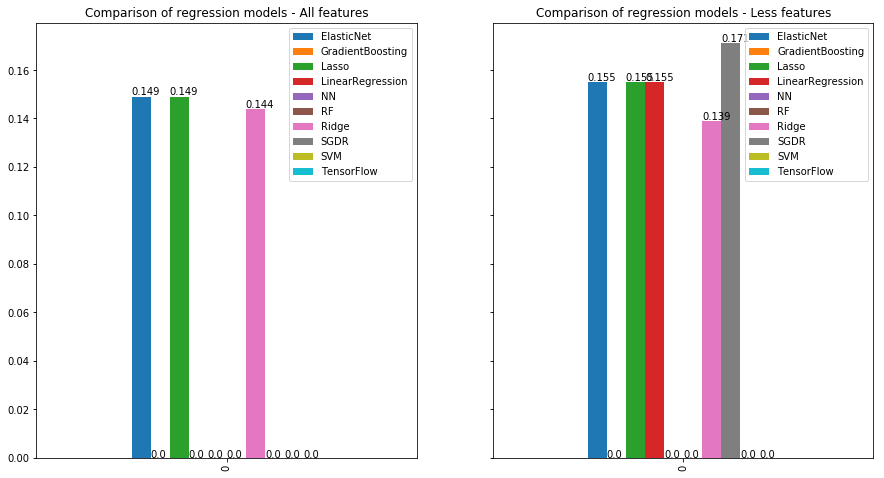

In [56]:
import matplotlib.gridspec as gridspec
from matplotlib import pyplot

fig1, axes = pyplot.subplots(ncols=2 ,figsize=(15, 8), sharey=True)

graph = pd.DataFrame(RMSE_results_allfeatures,index=[0])
graph1 = graph.plot(kind='bar',title="Comparison of regression models - All features",ax=axes[0])
for p in graph1.patches:
    graph1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

graph = pd.DataFrame(RMSE_results_lessfeatures,index=[0])
graph2 = graph.plot(kind='bar',title="Comparison of regression models - Less features",ax=axes[1])
for p in graph2.patches:
    graph2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [17]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier


# estimators = []
# estimators.append(('linear',classifierLinearRegression))
# estimators.append(('svr',classifierSVR))
# estimators.append(('rf',classifierRandomForestRegressor))

# # # create the ensemble model
# ensemble = VotingClassifier(estimators,voting='hard')
# ensemble = ensemble.fit(x_train,y_train)
# pred = []
# pred = np.array(pred,dtype='float64')
# pred = ensemble.predict(scaler.transform(data_test_less_features))
# result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
# result.to_csv('pred_EnsembleVoting.csv', columns=['SalePrice'])


#Emsemble via stacking
from mlxtend.regressor import StackingRegressor

dnn=[]
dnn = list(classifierDNNLess.predict((data_test_less_features),as_iterable=True))


stregr = StackingRegressor(regressors=[#classifierLinearRegression
                                       #,classifierSVRLess
                                       #classifierRF_lessFeatures
                                       classifierGBRLess
                                      #,classifierDNNLess
                                       ,classifierRidgeLess
                                       ,classifierLassoLess
                                       ,classifierElasticNetLess                                       
                                      ], 
                           meta_regressor=classifierRidgeLess)

stregr.fit(x_train_less,y_train)
pred = []
pred = np.array(pred)
pred = np.expm1(stregr.predict((data_test_less_features)))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_EnsembleStacker.csv', index =False)  


#Emsemble via avereging

final_labels = (
                #(classifierLinearRegression.predict((data_test_less_features)))  
               # + (classifierSVRLess.predict(scaler.transform(data_test_less_features))) 
               # + (classifierRF_lessFeatures.predict((data_test_less_features)))
                + (classifierGBRLess.predict((data_test_less_features)))
                + (classifierRidgeLess.predict((data_test_less_features)))
                + (classifierLassoLess.predict((data_test_less_features)))
                + (classifierElasticNetLess.predict((data_test_less_features)))
                + dnn
               
               ) / 5

## Saving to CSV
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': np.expm1(final_labels)}).to_csv('pred_EnsembleAvereging.csv', index =False)  


# All features

stregr = StackingRegressor(regressors=[classifierRidgeAll
                                       ,classifierLassoAll
                                       ,classifierElasticNetAll
                                       #,classifierAllFeaturesRF
                                       ], 
                           meta_regressor=classifierRidgeAll)

stregr.fit(x_train,y_train)
pred = []
pred = np.array(pred)
pred = np.expm1(stregr.predict((data_test)))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_EnsembleStacker_All.csv', index =False)  

#Emsemble via avereging

final_labels = (
                (classifierRidgeAll.predict((data_test)))  
                + (classifierLassoAll.predict((data_test))) 
                + (classifierElasticNetAll.predict((data_test)))
               # + (classifierAllFeaturesRF.predict(data_test))                 
                
               ) / 3

## Saving to CSV
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': np.expm1(final_labels)}).to_csv('pred_EnsembleAvereging_All.csv', index =False)  


print("Finished")

Finished
